<p align="center">
  <img width="460" height="300" src="https://www.ecoles.com.tn/sites/default/files/universite/logo/ept_logo.jpg">
</p>
<h1><center>$$Ecole~Polytechnique~de~Tunisie$$</center></h1>
<h2><center>$$Module:Data~Analysis$$</center></h2>
<h3><center>$$\large{Final~project}$$</center></h3>
<h3><center>$$This~work~is~done~by:~{\color{blue}{Sofien~Resifi}}$$</center></h3>

# $ Overview~:$
* This is the final project for the Data Analysis module.
* In this project we are going to work on the stock data of 84 comapnies in Tunisia.
* The goal of this project is to predict the next_day_return of 2019 for 84 company in Tunisia knowing the next_day_return of 2018.
* To perform predictions In this project we will be only using ${\color{red}{Linear~Regression}}$ techniques as seen in class.

# $Load~packages~\&~Import~the~data$

In [1]:
from IPython.display import clear_output            # This package is useful to clear the output just to make the code beautiful
!pip install factor_analyzer                        # Installing the package
clear_output()

In [2]:
import pandas as pd                                  # This packages will help as dealing with thd data Frame.
import matplotlib.pyplot as plt                      # Matplotlib and seaborn will be useful for doing some plots.
import seaborn as sns                                # For useful plots.
import numpy as np                                   # This packge is useful for dealing with arrays.
from scipy.stats import norm                         # This packges is useful for statistical calculs. 
from scipy.stats import kurtosis                     # This function is used to calculate the kurtosis of a varaible.
from scipy.stats import skew                         # This function is used to calculate the skewness of a varaible.
from scipy.special import boxcox1p                   # This is a useful package for the Box Cox transformation.
from scipy.stats import boxcox_normmax
from sklearn.linear_model import LinearRegression    # This is the linear regression model that we are going to use in this problem.
from sklearn.metrics import mean_squared_error       # This is our metric for the evaluation.
from sklearn.model_selection import train_test_split # This is a useful package for the evaluation of the model.
import requests, zipfile, io                         # This packages will be very useful when importing the data directely from Kaggle.
from sklearn import preprocessing                    # This package will be useful for the data standardization.
from sklearn.decomposition import PCA                # This package will be useful for applying the principal component analysis.
from factor_analyzer import FactorAnalyzer           # This pakcage will be useful for Factor Analysis.
sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
r = requests.get('https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/20379/1157170/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1601583521&Signature=TwcusmI%2BfeBrGwM1jOJJuVgKL92dKinEnrdf%2FgqFojaVF9ANK%2FuLxzaVkYg1JmGbiwx3287zB8q%2BoI%2BlNv5%2BZ3gskX3fzDTAt7bM8%2FmEUXWlFgXjgLSP6ZIpPWLzewFchYzZXOEC6oVu73uNNXIPZ%2Bk5Vk0cTZHqzwmkRNmgnTy%2BNw4psoG%2BdynENGk3baRbeiXDKY7DnRfYeDywl5wGk6ks91HF33Dmq6gv3UOIBObbQgjOncB3UHUTaALul6TNznVMafRwBH8juggFmuiJLMbm1ozWdjfmv115WnVJuuet%2BKpFJm3Fi%2FcyQd53LvsCoKozj3KV81loIEzh%2F4Rs7A%3D%3D&response-content-disposition=attachment%3B+filename%3Ddata-analysis-2020.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))           # Importing the zip folder from Kaggle.
z.extractall()                                       # Unzip the folder from Kaggle.

train=pd.read_csv("train.csv")                       # Read the train set. 
test=pd.read_csv("test.csv")                         # Read the test set. 
sub=pd.read_csv("sample_submission.csv")             # Read an example of a submission file.

# $The~data$

In [4]:
train.head()

,Id,date,company_code,company,yesterday_price,open,last,close,low,high,qty_traded,num_trades,value,next_day_ret
0,0,2018-01-02,725001,ADWYA,5.35,5.25,5.39,5.39,5.25,5.39,2926,7,15635.50,-161.101159
1,1,2018-01-02,340005,AMEN BANK,24.35,24.38,24.00,24.00,24.00,24.38,1519,12,36918.00,-91.056323
2,2,2018-01-02,730001,ARTES,6.20,6.27,6.10,6.10,6.09,6.27,35875,67,219020.05,159.011983
3,3,2018-01-02,714001,ASSAD,9.00,0.00,0.00,9.00,0.00,0.00,0,0,NaN,-98.000768
4,4,2018-01-02,360035,ATB,4.22,4.15,4.18,4.18,4.15,4.18,3705,7,15465.90,-158.659992


In [5]:
test.head()

,Id,date,company_code,company,yesterday_price,open,last,close,low,high,qty_traded,num_trades,value
0,20417,2019-01-02,725001,ADWYA,4.70,4.80,4.80,4.80,4.80,4.80,4296,5,20620.80
1,20418,2019-01-02,340005,AMEN BANK,27.80,27.80,27.75,27.75,27.50,27.80,261,9,7240.06
2,20419,2019-01-02,730001,ARTES,6.27,6.27,6.28,6.28,6.27,6.29,2532,4,15924.09
3,20420,2019-01-02,714001,ASSAD,7.80,7.79,8.02,8.02,7.78,8.02,14878,62,118592.33
4,20421,2019-01-02,360035,ATB,3.66,3.76,3.65,3.65,3.65,3.87,533,13,1948.72


This how the submission file should look like

In [6]:
sub.head()

,Id,next_day_ret
0,20417,-5.585104
1,20418,-5.936453
2,20419,-5.738705
3,20420,-4.663674
4,20421,-5.912768


In [7]:
print("train shape",train.shape)
print("test shape",test.shape)

train shape (20417, 14)
test shape (20331, 13)


The test set has about the same size as the train set and both contain 13 features in common(the target exists only the train set). 

# $Exploratory~Data~Analysis(EDA)$

In this part I'am going to performe initial investigations on data in order to understand it.
*  ${\color{blue}{\textbf{1) Observing the varaibles}}}$: I'am going to see the different varaibles using bunch of techniques that I have seen in class (scatter plots, histogrames, box plots, pairplots.....).
* ${\color{blue}{\textbf{2) Correlation Matrix}}}$: In order to understand the relationship between the varaibles I will use correlation matrix(Heatmap) 🤯.
* $ {\color{blue}{\textbf{3) Looking for outliers}}}$: Also I will be shearching for the oultliers, in fact in this problem our metric will be ${\color{red}{RMSE}}$(${\color{red}{R}}$oot ${\color{red}{M}}$ean ${\color{red}{S}}$quare ${\color{red}{E}}$rror). This metric is very sensitive to the outliers so removing them is a very good idea 😎.

## $1)~Observing~the~varaibles$

First let's see how does our target look like.

Text(0, 0.5, 'Frequency(1e6)')

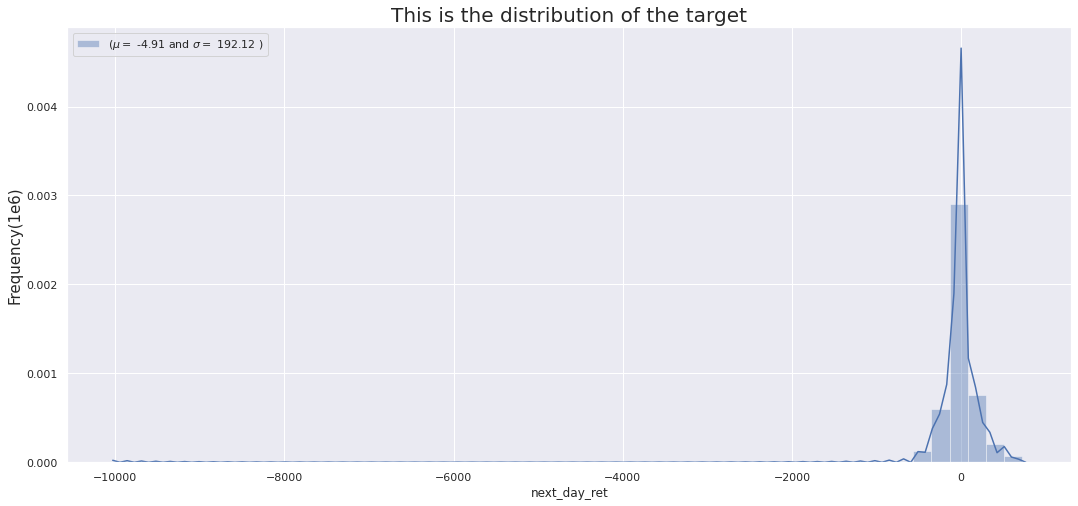

In [8]:
plt.subplots(figsize=(18,8))
sns.distplot(train['next_day_ret'])
(mu, sigma) = norm.fit(train['next_day_ret'])
plt.legend(['($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')          
plt.title("This is the distribution of the target",fontsize=20)
plt.ylabel("Frequency(1e6)",fontsize=15)

* After seeing the plot above we can see that our targer have a mean with the value -4.91 and a standard diviation with the value 192.12. Also we can see that the target has a value around -100000 which is probably an outlier 🧐 we will see it later.

Now let's take a look into the other varaibles:

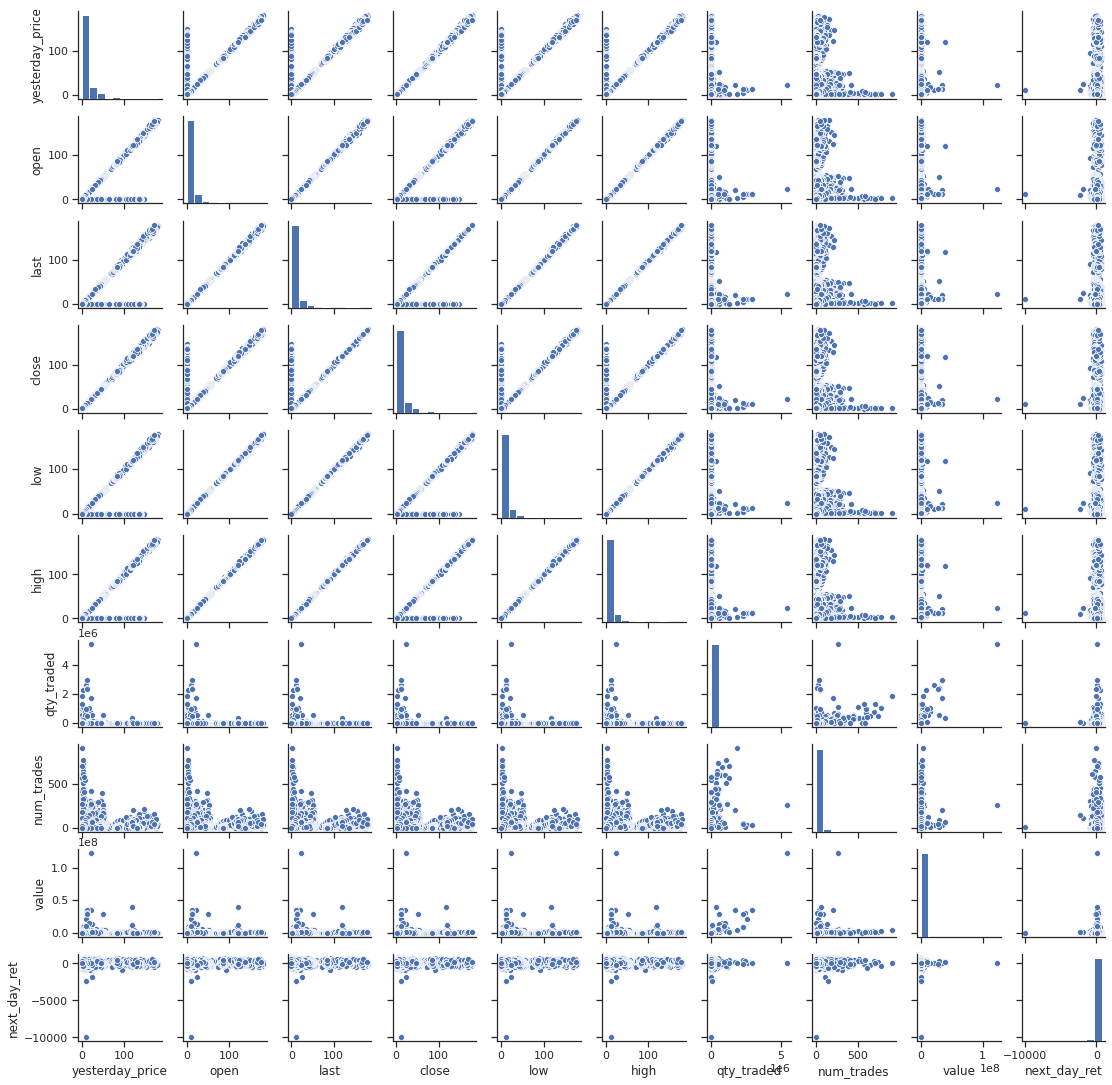

In [9]:
L=['yesterday_price', 'open', 'last', 'close', 'low', 'high', 'qty_traded', 'num_trades', 'value', 'next_day_ret'] #THis the list of varaibles we need to see 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(train[L],height=1.5)

* from this graph above we can see the plots of the varaibles in function of each others.
* There is something obvious in this pairplot, some varaibles are very correlated to each other like ${\color{blue}{high}}$ and ${\color{blue}{low}}$ or ${\color{blue}{close}}$ and ${\color{blue}{yesterday\_price}}$ so we will check their correlation later in this notebook.

Now let's see the distribution of some varaibles.
* we need to understand the nature of the varaibles, in other words we need to verify the skewness and kurtosis of the varaibles, therefor I'am going to use the distplot function from seaborn and some statistic calculation to measure the ${\color{red}{skewness}}$ and the ${\color{red}{kurtosis}}$.
* In this case I'am going to observe ${\color{green}{open}}$, ${\color{green}{close}}$, ${\color{green}{value}}$, and ${\color{green}{num\_trades}}$.

Text(0, 0.5, 'Frequency')

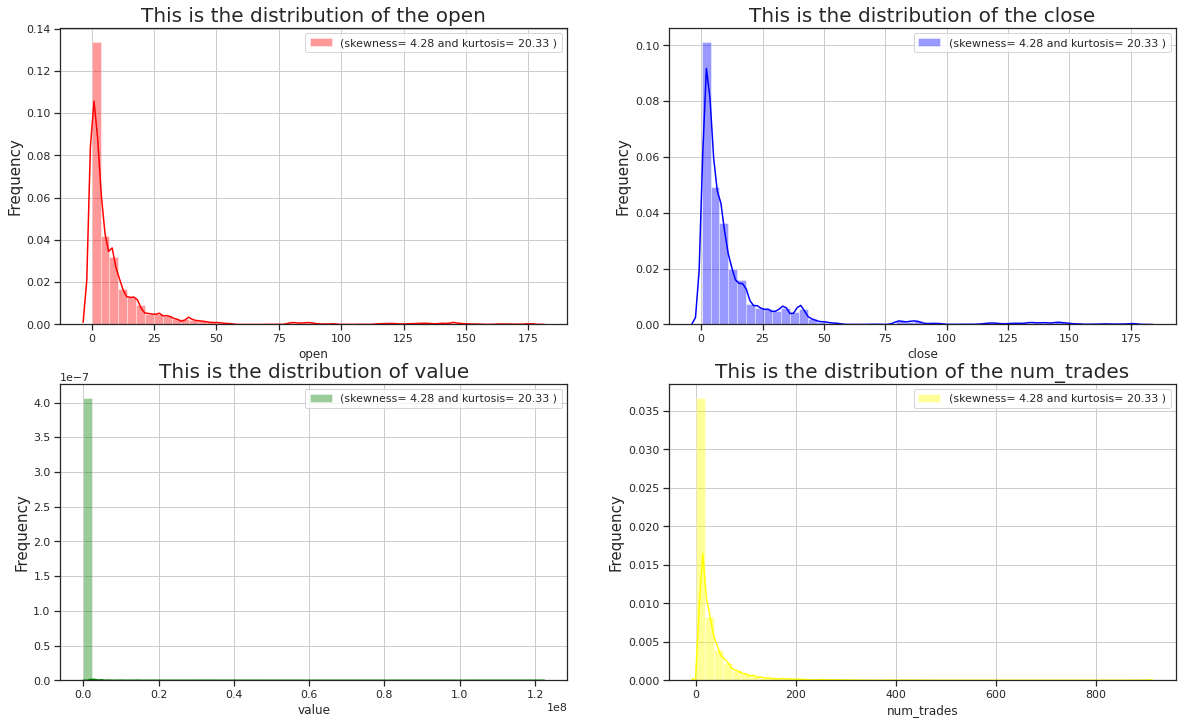

In [10]:
plt.subplots(figsize=(20,12))
plt.subplot(221)
sns.distplot(train['open'],color='red')
plt.legend(['(skewness= {:.2f} and kurtosis= {:.2f} )'.format(skew(train['open']), kurtosis(train['open']))])
plt.grid()
plt.title("This is the distribution of the open",fontsize=20)
plt.ylabel("Frequency",fontsize=15)
plt.subplot(222)
sns.distplot(train['close'],color='blue')
plt.legend(['(skewness= {:.2f} and kurtosis= {:.2f} )'.format(skew(train['open']), kurtosis(train['open']))])
plt.grid()
plt.title("This is the distribution of the close",fontsize=20)
plt.ylabel("Frequency",fontsize=15)
plt.subplot(223)
sns.distplot(train['value'],color='green')
plt.legend(['(skewness= {:.2f} and kurtosis= {:.2f} )'.format(skew(train['open']), kurtosis(train['open']))])
plt.grid()
plt.title("This is the distribution of value",fontsize=20)
plt.ylabel("Frequency",fontsize=15)
plt.subplot(224)
sns.distplot(train['num_trades'],color='yellow')
plt.legend(['(skewness= {:.2f} and kurtosis= {:.2f} )'.format(skew(train['open']), kurtosis(train['open']))])
plt.grid()
plt.title("This is the distribution of the num_trades",fontsize=20)
plt.ylabel("Frequency",fontsize=15)

* Here we can remarke that the these varaibles have high skewness and kurtosis so to solve this problem we will be using ${\color{red}{\underline{Box~Cox}}}$ later😎😎 . 

## $2)~Correlation~Matrix$

Let's see how our correlation matrix or hearmap looks like.


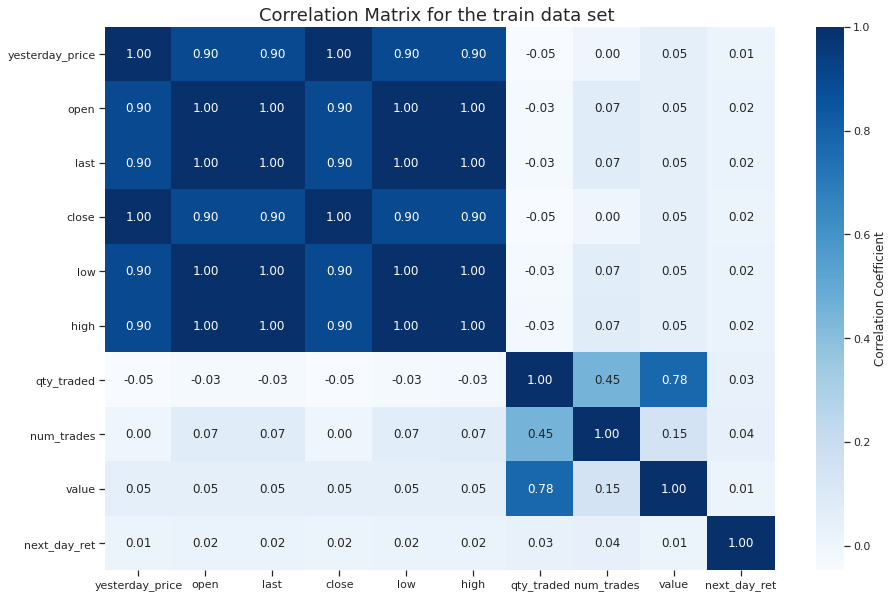

In [11]:
f, ax = plt.subplots(figsize= [15,10])
sns.heatmap(train[L].corr(), annot=True, fmt=".2f", ax=ax, 
            cbar_kws={'label': 'Correlation Coefficient'}, cmap="Blues")
ax.set_title("Correlation Matrix for the train data set ", fontsize=18)
plt.show()

* As expected some varaibles are very correlated to each other like ${\color{blue}{high}}$ and ${\color{blue}{open}}$ or ${\color{blue}{close}}$ and ${\color{blue}{yesterday\_price}}$ and the correlation is up to 1.
* In the Heatmap above we have too many varaibles correlated to each others, it is some sort of duplicated varaibles so we will deal with this problem later using PCA for dimension reduction. 
* This final project is based on linear regression prediction so what really matters is the correlation between the varaibles and the target.
* The obvious thing in this matrix is the low correlation with the ${\color{red}{next\_day\_ret}}$ (The target), For the time being we can't say for sure that these low correlation will be an issue 😥 😤.

## $3)~Looking~for~outliers$🔍🔍

In [12]:
def plot_cat(all_data,var,target='next_day_ret') : 
  data = pd.concat([all_data[target], all_data[var]], axis=1)
  f, ax = plt.subplots(figsize=(60, 8))
  fig = sns.boxplot(x=var, y=target, data=data)
  fig.axis(ymin=-2000, ymax=2000)

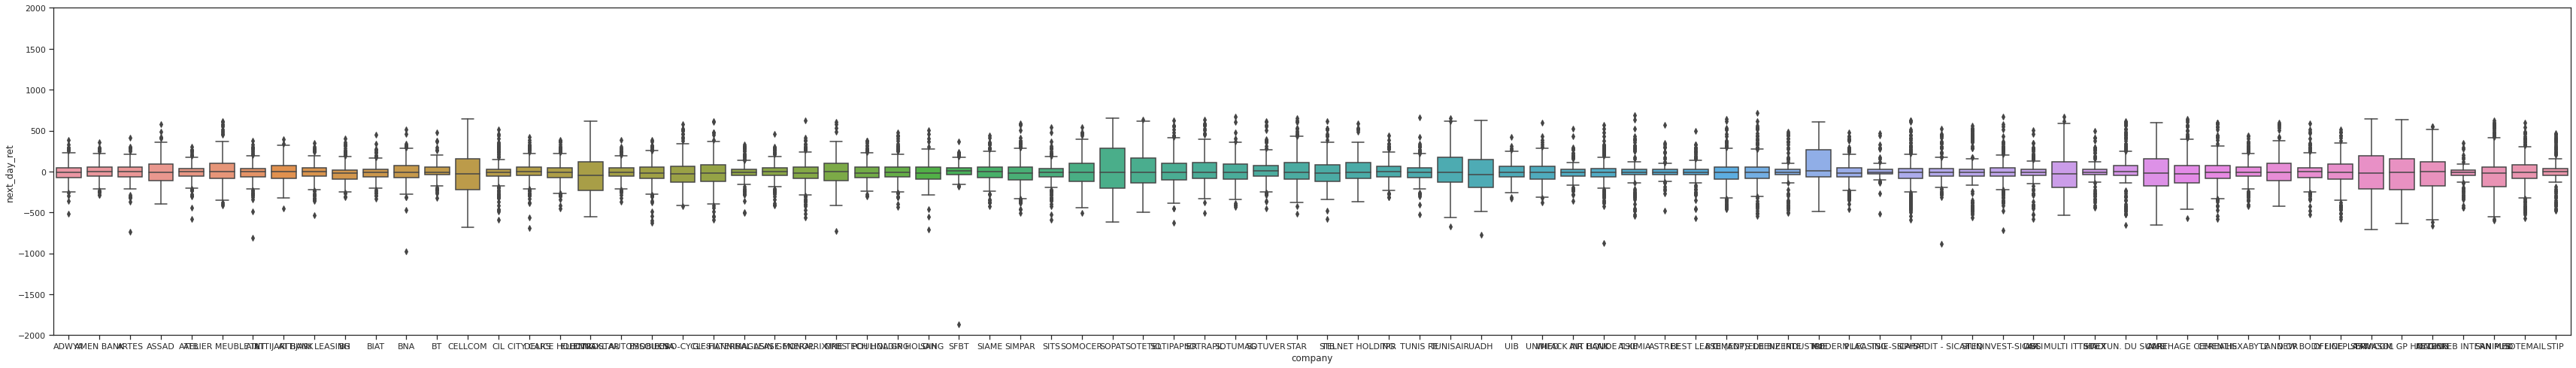

In [13]:
plot_cat(train,'company')

* This is the box plot for 84 company. 
* First let's understand what is an outlier. An outlier is a data point that differs significantly from other observations.
* In our case we will consider a value smaller than -1800 as an outlier for the ${\color{blue}{next\_day\_ret}}$.


Text(50, -3000, 'This is an outlier')

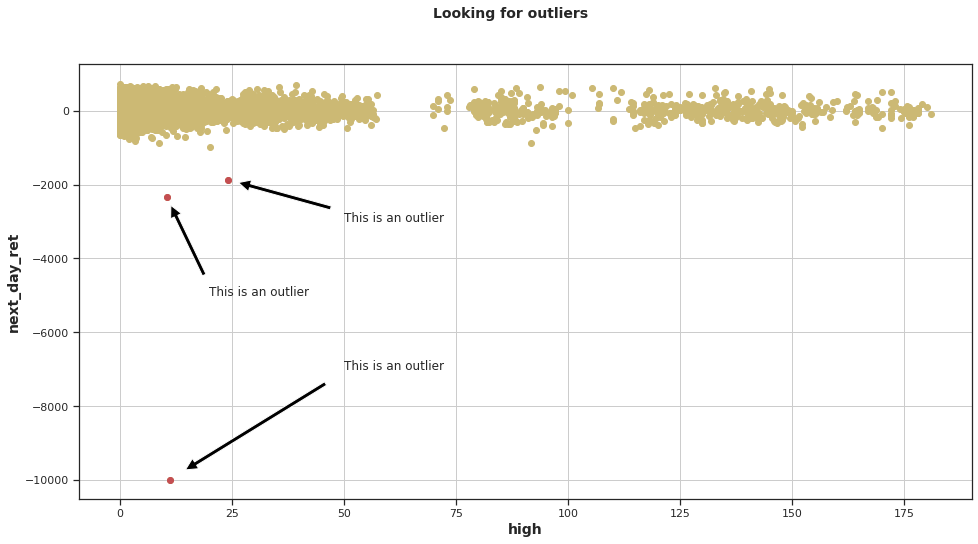

In [14]:
fig, ax = plt.subplots(figsize=(16, 8))
fig.suptitle('Looking for outliers', fontsize=14, fontweight='bold')
plt.grid()
plt.scatter(train['high'],train['next_day_ret'],color="y")
plt.xlabel("high",fontsize=14,fontweight='bold')
plt.ylabel("next_day_ret",fontsize=14,fontweight='bold')
ax.plot([11.19], [-9984.166026], 'ro')
ax.annotate('This is an outlier', xy=(11.19, -9984.166026), xytext=(50, -7000),
            arrowprops=dict(facecolor='black', shrink=0.09))
ax.plot([10.60], [-2347.097753], 'ro')
ax.annotate('This is an outlier', xy=(10.60, -2347.097753), xytext=(20, -5000),
            arrowprops=dict(facecolor='black', shrink=0.09))
ax.plot([24.20], [-1867.193152], 'ro')
ax.annotate('This is an outlier', xy=(24.20, -1867.193152), xytext=(50, -3000),
            arrowprops=dict(facecolor='black', shrink=0.09))

In [15]:
#Let's drop those outliers
train=train[train['next_day_ret']>-1800]

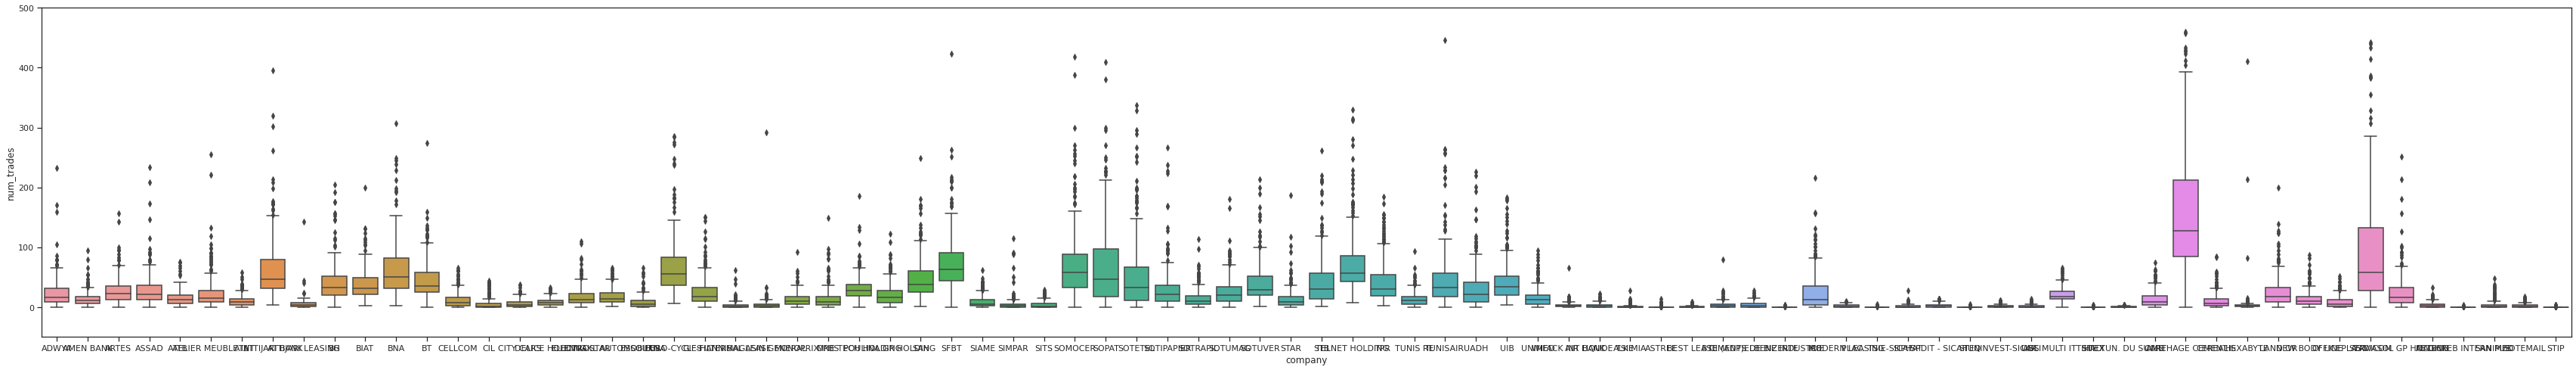

In [16]:
data = pd.concat([train['num_trades'], train['company']], axis=1)
f, ax = plt.subplots(figsize=(60, 8))
fig = sns.boxplot(x='company', y="num_trades", data=data)
fig.axis(ymin=-50, ymax=500);

Text(700, -1000, 'This is an outlier')

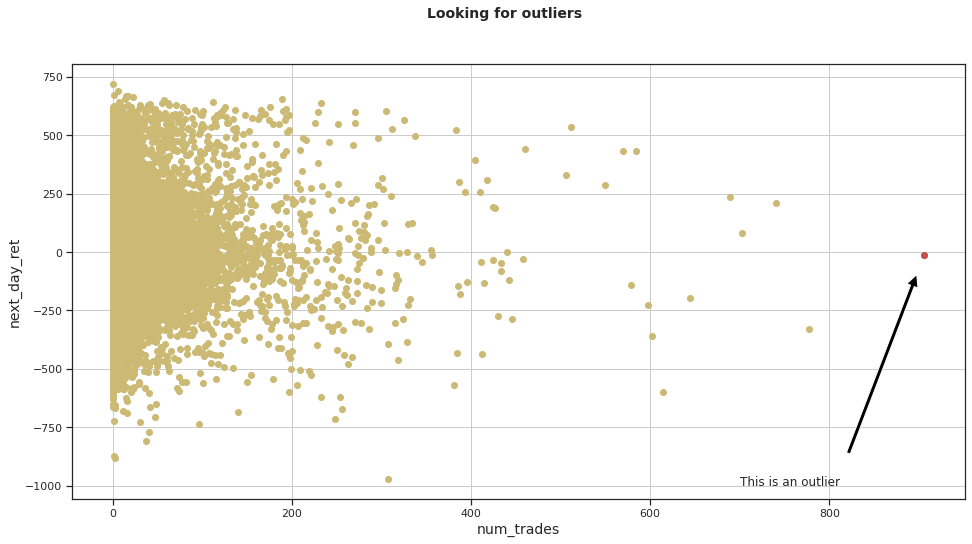

In [17]:
fig, ax = plt.subplots(figsize=(16, 8))
fig.suptitle('Looking for outliers', fontsize=14, fontweight='bold')
plt.grid()
plt.scatter(train['num_trades'],train['next_day_ret'],color="y")
plt.xlabel("num_trades",fontsize=14)
plt.ylabel("next_day_ret",fontsize=14)
ax.plot([906], [-11.665425], 'ro')
ax.annotate('This is an outlier', xy=(906, -11.665425), xytext=(700, -1000),
            arrowprops=dict(facecolor='black', shrink=0.09))


In [18]:
#let's drop that outlier 
train=train[train['num_trades']<800]

# $Data~processing~\&~feature~engineering$

Now we are going to start making our data better, therefore we are going to concatenate the ${\color{green}{train~set}}$ and the ${\color{green}{test~set}}$ into one data which is all_data in order to evoid the duplication of the code.
* ${\color{blue}{1)~Feature~engineering}}$: In this part of the notebook we are going to create new features.
* ${\color{blue}{2)~Transformations}}$ : I'am going to perform some transformations like ${\color{red}{Box~cox}}$ transformation.
* ${\color{blue}{3)~standardization}}$ : is scaling technique where the values are centered around the mean with a unit standard deviation.
<h3><center>$$x_i= \frac{x_i -\bar{x}}{\sigma}$$</center></h3>
 

## $1)~Feature~engineering$

In [19]:
#Here I'am going to remove the target from the train set in order to concatenate the train and the test
target=train['next_day_ret']
train.drop("next_day_ret",inplace=True,axis=1)

In [20]:
#This is the all data(train+test)
all_data = pd.concat([train,test],ignore_index =True)

Here I'am going to calculate the ${\color{red}{currReturn}}$ 

In [21]:
all_data['currReturn']=all_data.groupby(['company'])['close'].pct_change()

In the data we have a feautre called ${\color{red}{date}}$  so I'am going to extract some feature from it.
* ${\color{blue}{month}}$
* ${\color{blue}{day}}$
* ${\color{blue}{day~of~year}}$
* ${\color{blue}{year}}$



In [22]:
all_data.date=pd.to_datetime(all_data.date,format='%Y-%m-%d')
all_data.loc[:,'month']=all_data['date'].dt.month 
all_data.loc[:,'day']=all_data['date'].dt.day
all_data.loc[:,'dayOfyear']=all_data['date'].dt.dayofyear
all_data.loc[:,'year']=all_data['date'].dt.year

After using the date to create some feature, now we will use them to create ohers.
* ${\color{blue}{close\_per\_year\_month\_company}}$ : This feature is the mean of the $\underline{\large close}$ of companies in a certain month in certain year
* ${\color{blue}{value\_per\_year\_month\_company}}$ : This feature is the mean of the $\underline{\large value}$ of companies in a certain month in certain year.
* ${\color{blue}{yesterday\_price\_per\_year\_month\_company}}$ : This feature is the mean of the $\underline{\large yesterday\_price}$ of companies in a certain month in certain year

In [23]:
#close_per_year_month_company
new=all_data.groupby(['company','year','month'])['close'].mean()
all_data = pd.merge(all_data,new,how='left',left_on=['company','year','month'],right_on=['company','year','month'])
all_data=all_data.rename(columns={"close_x":"close","close_y":'close_per_year_month_company'})

#value_per_year_month_company
new=all_data.groupby(['company','year','month'])['value'].mean()
all_data = pd.merge(all_data,new,how='left',left_on=['company','year','month'],right_on=['company','year','month'])
all_data=all_data.rename(columns={"value_x":"value","value_y":'value_per_year_month_company'})

#yesterday_price_per_year_month_company
new=all_data.groupby(['company','year','month'])['yesterday_price'].mean()
all_data = pd.merge(all_data,new,how='left',left_on=['company','year','month'],right_on=['company','year','month'])
all_data=all_data.rename(columns={"yesterday_price_x":"yesterday_price","yesterday_price_y":'yesterday_price_per_year_month_company'})

Before doing some transformations we must deal with the missing values in the data.

In [24]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(10)

,Missing Ratio
value,24.671117
value_per_year_month_company,2.842136
currReturn,0.201257


In [25]:
all_data["value"] = all_data.groupby(['company','year','month'])["value"].transform(
    lambda x: x.fillna(x.mean()))
all_data["currReturn"] = all_data.groupby("company")["currReturn"].transform(
    lambda x: x.fillna(0))

In [26]:
all_data["value"] = all_data.groupby('company')["value"].transform(
    lambda x: x.fillna(x.mean()))
all_data["value_per_year_month_company"] = all_data.groupby('company')["value_per_year_month_company"].transform(
    lambda x: x.fillna(x.mean()))

## $2)~Trasformations$.

I'am going to use the ${\color{blue}{Box~cox}}$ transformation, but let's see the impact of such transformation.
* For example let's try it on ${\color{green}{close}}$ and ${\color{green}{value}}$.

Text(0, 0.5, 'Frequency')

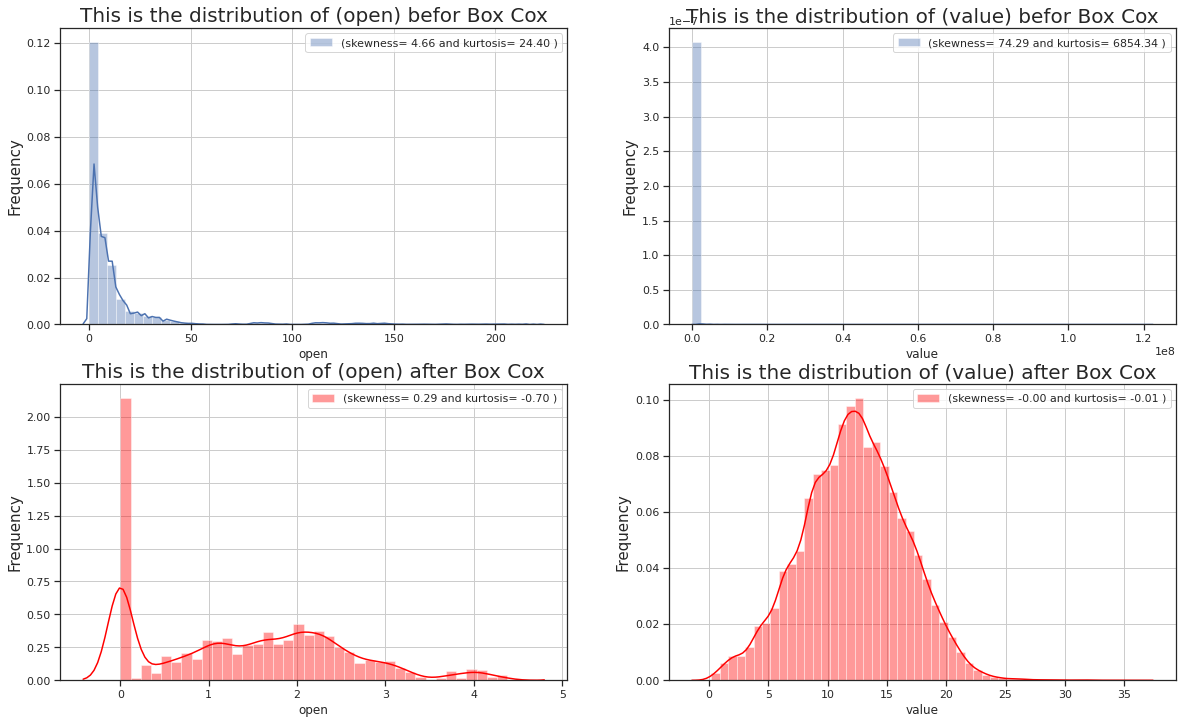

In [27]:
plt.subplots(figsize=(20,12))
plt.subplot(221)
sns.distplot(all_data['open'])
plt.legend(['(skewness= {:.2f} and kurtosis= {:.2f} )'.format(skew(all_data['open']), kurtosis(all_data['open']))])
plt.grid()
plt.title("This is the distribution of (open) befor Box Cox",fontsize=20)
plt.ylabel("Frequency",fontsize=15)

plt.subplot(222)
sns.distplot(all_data['value'])
plt.legend(['(skewness= {:.2f} and kurtosis= {:.2f} )'.format(skew(all_data['value']), kurtosis(all_data['value']))])
plt.grid()
plt.title("This is the distribution of (value) befor Box Cox",fontsize=20)
plt.ylabel("Frequency",fontsize=15)

plt.subplot(223)
Open=boxcox1p(all_data['open'], boxcox_normmax(all_data['open']+1))
sns.distplot(Open,color="red")
plt.legend(['(skewness= {:.2f} and kurtosis= {:.2f} )'.format(skew(Open), kurtosis(Open))])
plt.grid()
plt.title("This is the distribution of (open) after Box Cox",fontsize=20)
plt.ylabel("Frequency",fontsize=15)

plt.subplot(224)
Value=boxcox1p(all_data['value'], boxcox_normmax(all_data['value']+1))
sns.distplot(Value,color='red')
plt.legend(['(skewness= {:.2f} and kurtosis= {:.2f} )'.format(skew(Value), kurtosis(Value))])
plt.grid()
plt.title("This is the distribution of (value) after Box Cox",fontsize=20)
plt.ylabel("Frequency",fontsize=15)

Since the Box Cox transformation is very efficient for the problem of skewness and kurtosis,we will apply it to the rest of the data.

In [28]:
#Here I'am going to drop some useless feature like Id, data...
date=all_data['date']
all_data.drop(['date','Id','company_code'],inplace=True,axis=1)

In [29]:
#For the encoding of the categorical variable ('company') we are going to use get_dummies. 
all_data = pd.get_dummies(all_data).reset_index(drop=True)

In [30]:
#Here we will extract the skewed features
skew_features = all_data[all_data.columns].apply(lambda x: skew(x)).sort_values(ascending=False)
#Box Cox will be applied only on high skewed varaibles in this case a varaible that has skeweness greatter than 2 is considered a high skewed varaible
high_skew = skew_features[skew_features > 2]
skew_index = high_skew.index
for i in skew_index:
    all_data[i] = boxcox1p(all_data[i], boxcox_normmax(all_data[i]+1))

## $3)~Standardization$

In [31]:
names=all_data.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(all_data)
all_data = pd.DataFrame(scaled_df, columns=names)

## $4)~Principal~component~analysis$

*Here* I'am going to apply pca the following varaibles: ${\color{blue}{open}}$, ${\color{blue}{low}}$, ${\color{blue}{high}}$, ${\color{blue}{last}}$, and ${\color{blue}{close}}$

In [32]:
#This the number of component 
num_pc =2

X = np.asarray(all_data[['open','low','high','last','close']])
[n,m] = X.shape
print ('The number of timestamps is {}.'.format(n))
print ('The number of stocks is {}.'.format(m))

pca = PCA(n_components=num_pc) # number of principal components
pca.fit(X)

percentage =  pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print ('{0:.2f}% of the variance is explained by the first 2 PCs'.format(percentage_cum[-1]*100))

pca_components = pca.components_

The number of timestamps is 40744.
The number of stocks is 5.
100.00% of the variance is explained by the first 2 PCs


* Only 2 component are able to describe 100% of the variance in feature selected.


Now let's see the cumulative contribution of the component.

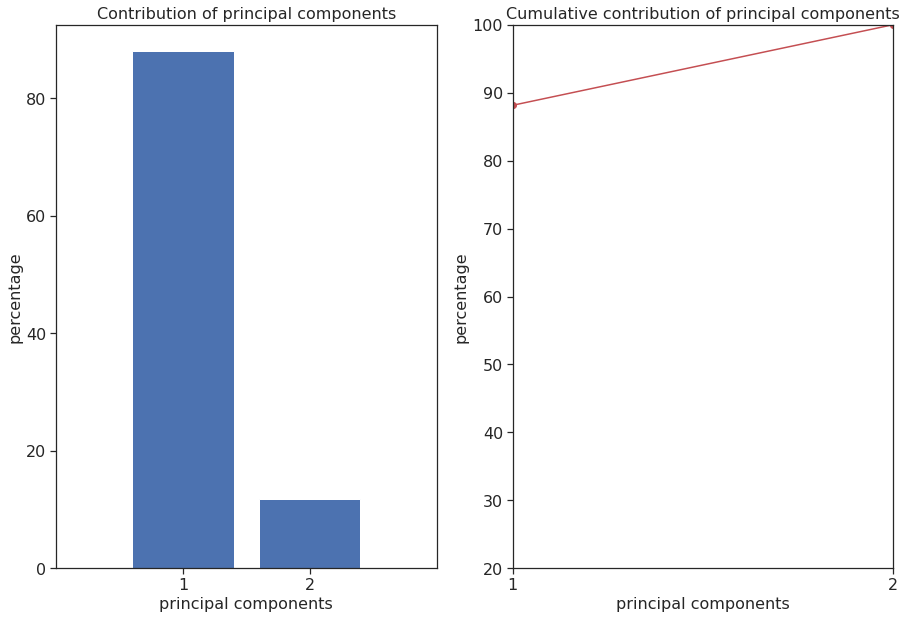

In [33]:
x = np.arange(1,len(percentage)+1,1)
plt.subplots(figsize= [15,10])
plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of principal components',fontsize = 16)
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.title('Cumulative contribution of principal components',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([1, num_pc])
plt.ylim([20,100]);

In [34]:
pricipal_component = X.dot(pca_components.T)
pricipal_component = pd.DataFrame(columns=["PC1", "PC2"], 
                              index=all_data.index,
                              data=pricipal_component)
pricipal_component.head()

,PC1,PC2
0,0.475658,-0.266363
1,2.786535,0.193230
2,0.697262,-0.230928
3,-2.305388,1.152681
4,0.105235,-0.369889


* To interpret each component, we must compute the correlations between the original data and each principal component.

* These correlations are obtained using the correlation procedure. In the variable statement we include the first two principal components,${\color{green}{\underline{PC1}}}$ and ${\color{green}{\underline{PC2}}}$, in addition to all six of the original variables. We use the correlations between the principal components and the original variables to interpret these principal components.
Because of standardization, all principal components will have mean 0. The standard deviation is also given for each of the components and these are the square root of the eigenvalue.

* The correlations between the principal components and the original variables are copied into the following correlation matrix. we can also note that if we look at the principal components themselves, then there is zero correlation between the components since the pricipal components are orthorgonal to each others.

In [35]:
correlation=all_data[['open','low','high','last','close']]
correlation=correlation.join(pricipal_component, rsuffix='_text')

In [36]:
#Here I'am trying to create the correlation matrix between the two component and 
corr=correlation.corr()
corr[5:].T[:5]

,PC1,PC2
open,0.992045,-0.125809
low,0.992124,-0.125180
high,0.991983,-0.126309
last,0.992044,-0.125819
close,0.685773,0.727816


${\color{red}{\large Interpretation}}$ :
* We can remarke that PC1 is too correlated to ${\color{blue}{open}}$, ${\color{blue}{low}}$, ${\color{blue}{high}}$, ${\color{blue}{last}}$.The obvious thing here is that those varaibes are too correlated to each other which is a confiramtion of what we have seen the correlation matrix(heatmap), we an also say that those features vary together. Also we can notice that PC1 is not too correlated to ${\color{blue}{close}}$ as it is correlated to the other variables.
* For PC2, we can notice that it is mainly about the feautre ${\color{blue}{close}}$ so it seems that close is not like the other features en terme of correlation.

Now let's add those two componet to all_data and drop the useless features.

In [37]:
#Here I added the pricipale component to all_data.
all_data=all_data.join(pricipal_component, rsuffix='_text')
#Droping the useless varaibles.
all_data.drop(['open','low','high'],inplace=True,axis=1)

In [38]:
all_data.head()

,yesterday_price,last,close,qty_traded,num_trades,value,currReturn,month,day,dayOfyear,year,close_per_year_month_company,value_per_year_month_company,yesterday_price_per_year_month_company,company_ADWYA,company_AETECH,company_AIR LIQUDE TSIE,company_ALKIMIA,company_AMEN BANK,company_AMS,company_ARTES,company_ASS MULTI ITTIHAD,company_ASSAD,company_ASTREE,company_ATB,company_ATELIER MEUBLE INT,company_ATL,company_ATTIJARI BANK,company_ATTIJARI LEASING,company_BEST LEASE,company_BH,company_BIAT,company_BNA,company_BT,company_BTE (ADP),company_CARTHAGE CEMENT,company_CELLCOM,company_CEREALIS,company_CIL,company_CIMENTS DE BIZERTE,...,company_OFFICEPLAST,company_ONE TECH HOLDING,company_PLAC. TSIE-SICAF,company_POULINA GP HOLDING,company_SAH,company_SANIMED,company_SERVICOM,company_SFBT,company_SIAME,company_SIMPAR,company_SIPHAT,company_SITEX,company_SITS,company_SOMOCER,company_SOPAT,company_SOTEMAIL,company_SOTETEL,company_SOTIPAPIER,company_SOTRAPIL,company_SOTUMAG,company_SOTUVER,company_SPDIT - SICAF,company_STAR,company_STB,company_STE TUN. DU SUCRE,company_STEQ,company_STIP,company_TAWASOL GP HOLDING,company_TELNET HOLDING,company_TPR,company_TUNINVEST-SICAR,company_TUNIS RE,company_TUNISAIR,company_UADH,company_UBCI,company_UIB,company_UNIMED,company_WIFACK INT BANK,PC1,PC2
0,-0.102724,0.276152,-0.096361,0.494701,0.036829,0.267532,0.002081,-1.589285,-1.574434,-1.707574,-0.997989,-0.059065,0.741150,-0.062145,8.998882,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111012,-0.111125,-0.111012,-0.111125,-0.111125,-0.111125,-0.111125,...,-0.111125,-0.111125,-0.111125,-0.110671,-0.111125,-0.111125,-0.111125,-0.111012,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.110898,-0.111125,-0.111125,-0.111125,0.475658,-0.266363
1,1.103407,1.279351,1.092913,0.263805,0.357180,0.648070,0.002081,-1.589285,-1.574434,-1.707574,-0.997989,1.090662,0.826663,1.090726,-0.111125,-0.111125,-0.111125,-0.111125,8.998882,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111012,-0.111125,-0.111012,-0.111125,-0.111125,-0.111125,-0.111125,...,-0.111125,-0.111125,-0.111125,-0.110671,-0.111125,-0.111125,-0.111125,-0.111012,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.110898,-0.111125,-0.111125,-0.111125,2.786535,0.193230
2,0.023441,0.357634,0.009523,1.604690,1.509074,1.506446,0.002081,-1.589285,-1.574434,-1.707574,-0.997989,0.040412,1.313909,0.037408,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,8.998882,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111012,-0.111125,-0.111012,-0.111125,-0.111125,-0.111125,-0.111125,...,-0.111125,-0.111125,-0.111125,-0.110671,-0.111125,-0.111125,-0.111125,-0.111012,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.110898,-0.111125,-0.111125,-0.111125,0.697262,-0.230928
3,0.336452,-1.277827,0.336335,-1.269470,-1.250730,0.934617,0.002081,-1.589285,-1.574434,-1.707574,-0.997989,0.372520,0.734986,0.369461,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,8.998882,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-0.111125,-

## $5)~Factor~Analysis$

### $5)~a)~Adequacy~Test$
Before we perform factor analysis, we need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:
* ${\color{blue}{\underline{Kaiser-Meyer-Olkin~(KMO)~Test:}}}$measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1.

In [39]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(all_data[['qty_traded','yesterday_price','currReturn','value',"num_trades"]])
clear_output()

In [40]:
print(kmo_model)

0.5580034618560321


* The closer the KMO. measure to 1 indicate a sizeable sampling adequacy,0.8 and higher are great,0.7 is acceptable, 0.6 is mediocre less than 0.5 is unaccaptable 
* The overall KMO for our data is 0.55,this value indicates that we can proceed with our planned factor analysis.



### $5)~b)~Choosing~the~number~of~factors$

 Now we need to choose the number of factors that we will use:
* For choosing the number of factors, we can use scree plot. Which is based on eigenvalues.

In [41]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(all_data[['qty_traded','yesterday_price','currReturn','value',"num_trades"]])
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.56815572, 1.12720819, 0.99497705, 0.24780875, 0.06185029])

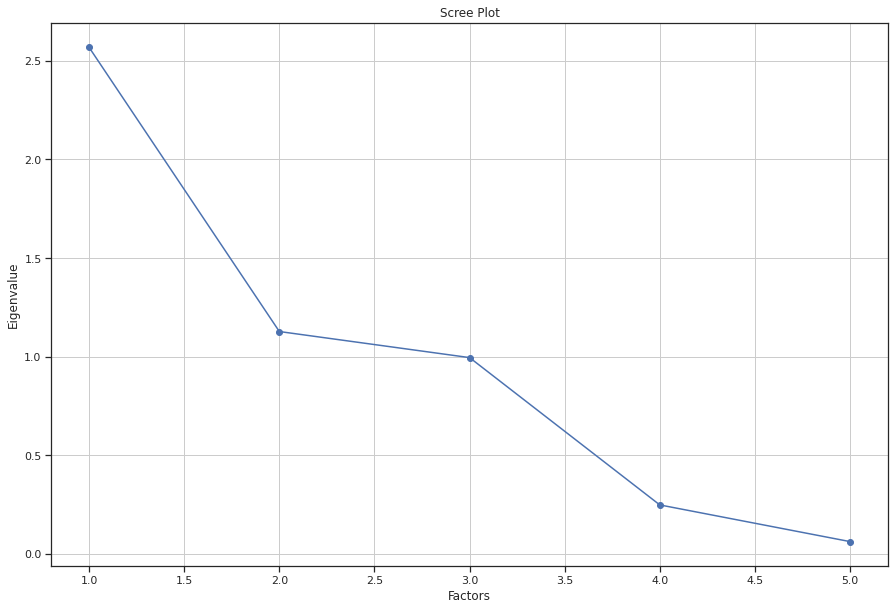

In [42]:
# Create scree plot using matplotlib
plt.subplots(figsize= [15,10])
plt.scatter(range(1,all_data[['qty_traded','yesterday_price','currReturn','value',"num_trades"]].shape[1]+1),ev)
plt.plot(range(1,all_data[['qty_traded','yesterday_price','currReturn','value',"num_trades"]].shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.

Here, you can see only for ${\color{red}{2~factors}}$, eigenvalues are greater than one. It means we need to choose only ${\color{red}{2}}$ factors (or unobserved variables).

In [43]:
fa = FactorAnalyzer( )
fa.set_params(n_factors=2,rotation=None)
fa.fit(all_data[['qty_traded','yesterday_price','currReturn','value',"num_trades"]])
clear_output()

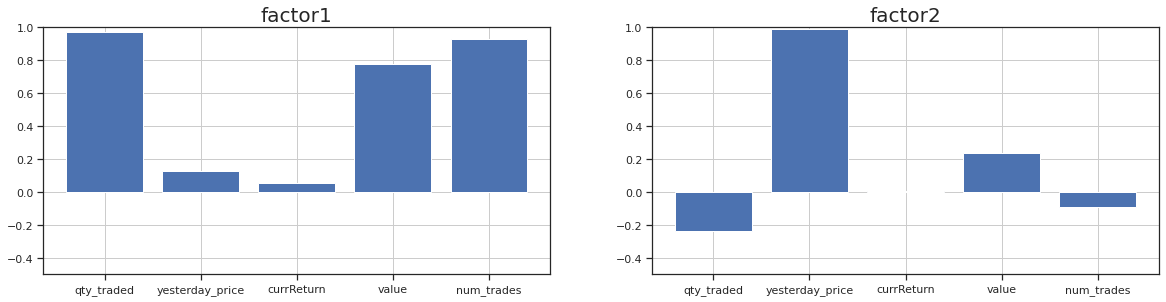

In [44]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.bar(all_data[['qty_traded','yesterday_price','currReturn','value',"num_trades"]].columns,fa.loadings_[:,0])
plt.title('factor1',fontsize=20)
plt.ylim([-0.5,1]);
plt.grid()
plt.subplot(2, 2, 2)
plt.bar(all_data[['qty_traded','yesterday_price','currReturn','value',"num_trades"]].columns,fa.loadings_[:,1])
plt.title('factor2',fontsize=20)
plt.ylim([-0.5,1]);
plt.grid()

In [45]:
# Let's see the loadings and try to interpret them.
factor_loadings=pd.DataFrame()
factor_loadings['Factor_1']=fa.loadings_[:,0]
factor_loadings['Factor_2']=fa.loadings_[:,1:2]
factor_loadings['features']=all_data[['qty_traded','yesterday_price','currReturn','value',"num_trades"]].columns.tolist()
factor_loadings.set_index('features')

,Factor_1,Factor_2
features,,
qty_traded,0.970628,-0.234330
yesterday_price,0.126065,0.989559
currReturn,0.056728,0.003776
value,0.778345,0.239547
num_trades,0.926448,-0.090632


* Factor 1 has high factor loadings for ${\color{red}{qty\_traded}}$ ,${\color{red}{num\_trades}}$, and ${\color{red}{value}}$ with respectively the values ${\color{blue}{0.970628}}$, ${\color{blue}{0.926448}}$, and ${\color{blue}{0.778345}}$ ,this indicates that the factor_1 strongly influences those variables,and we notice that Factor_1 has very low loadings for almost the other varaibles factor_1 has a weak influence on those variables.
* Factor 2 has high factor loadings for ${\color{red}{yesterday\_price}}$.


In [46]:
#Here I'am creating a data Frame which contains two factors Factor_1 and Factor_2.
Factor_analysis_data=pd.DataFrame(fa.transform(all_data[['qty_traded','yesterday_price','currReturn','value',"num_trades"]].values))
#Changing the name of the columns of the data.
Factor_analysis_data=Factor_analysis_data.rename(columns={0:"Factor_1",1:'Factor_2'})

In [47]:
#I'am going to add those two factors to the all_data.
all_data['Factor_1']=Factor_analysis_data['Factor_1']
all_data['Factor_2']=Factor_analysis_data['Factor_2']

In [48]:
#Droping the useless feautres.
all_data.drop(['qty_traded','yesterday_price','currReturn','value',"num_trades"],inplace=True,axis=1)

# $Modeling$

In this part we are going to use a linear regression approach to predict the next_day_return for 84 company in 2019.So we need to predict an to evalute our model through the crosvalidations.
* ${\color{blue}{1)~Prediction}}$ : I'am going to use the Linear Regression model from Scikitlearn
* ${\color{blue}{2)~Evaluation~\&~Residual~Analysis}}$ : 

## $1)~Prediction$

First let's recreate the train set and the test set from all_data.


In [49]:
train=all_data.iloc[:len(target), :]    #Extracting the train from all_data.
test =all_data.iloc[len(target):, :]    #Extracting the test from all_data.

In [50]:
#let's see the shapes of our train and test after the data processing.
print("train shape",train.shape)
print("test shape",test.shape)

train shape (20413, 95)
test shape (20331, 95)


In [51]:
#Here I divided the train set into train(X_train) and test data(x_test:crossvalidation).
X_train, x_test, Y_train, y_test = train_test_split(train, target,test_size=0.1,random_state=1)

In [52]:
reg = LinearRegression().fit(X_train,Y_train)      # Training the Linear Regression model.
preds_train = reg.predict(X_train)                 # Prediction on the train part.
pred_test=reg.predict(x_test)                      # Prediction on the crossvalidation part.

## $2)~Evaluation~\&~Residual~Analysis$

### $2)~a)~Residual~analysis$
Many of the assumptions that are necessary to have a valid linear regression model can be checked by identifying patterns in the residuals of that model.
* There are about 3 major assumptions for Linear Regression models:

${\color{blue}{1)~Mean~of~residuals}}$

In [53]:
error =Y_train-preds_train
error.mean()

-0.0016321992093744312

Here we can see that the mean is too close to zero.

${\color{blue}{2)~No~auto-correlation~between~the~residuals}}$.

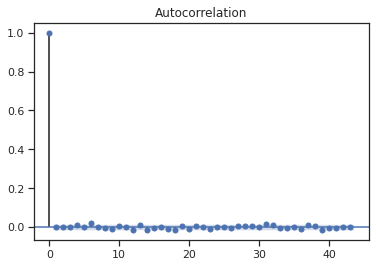

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(error);

We can see that the correaltion is almost zero this assumption is verfied.

${\color{blue}{3)~Residuals~should~be~constant~or~equal~variance}}$ ${\color{red}{~i.e~Homoscedasticity}}$

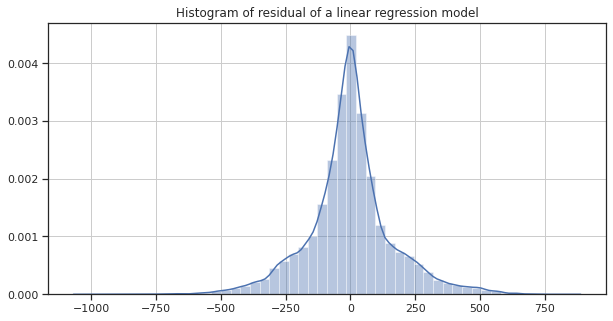

In [55]:
plt.subplots(figsize= [10,5])
sns.distplot(error.values)
plt.title("Histogram of residual of a linear regression model")
plt.grid()

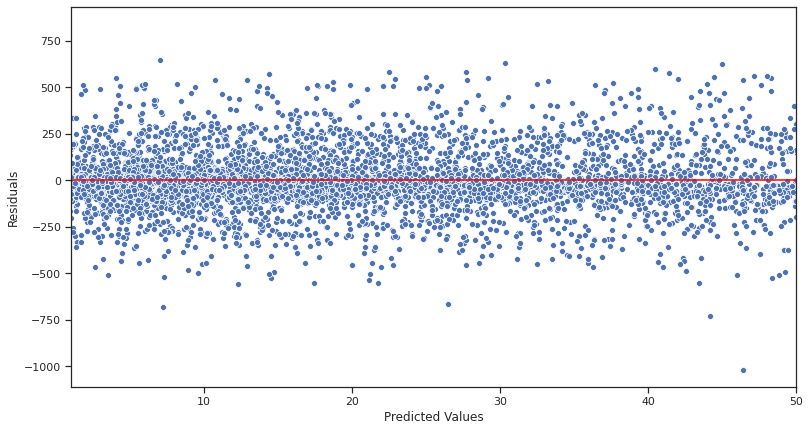

In [56]:
plt.subplots(figsize= [13,7])
sns.scatterplot(preds_train, error);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals');
plt.xlim([1,50]);

Above scatter plot shows the distribution of Residuals and Predicted Values (or Fitted Values).
There is no pattern in the plot, specifically no parabolic pattern, that means, the model has captured non-linear effects. There is no funnel shape distribution in the plot, this means, signs of homoscedasticity. So the assumption is verified.
* Now after those assumption we can proceed with a linear regression model. 

### $2)~b)~Evaluation$

The evaluation metric is ${\color{blue}{RMSE}}$(${\color{blue}{R}}$oot ${\color{blue}{M}}$ean ${\color{blue}{S}}$quare ${\color{blue}{E}}$rror).
<h3><center>$$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{(\hat{x_i} -x_i)^2}}$$</center></h3>

In [57]:
train_error =np.sqrt(mean_squared_error(Y_train, preds_train ))
test_error=np.sqrt(mean_squared_error(y_test, pred_test ))
print('train_error',train_error)
print('test_error',test_error)

train_error 165.80503573284145
test_error 166.54478360869308


* We notice that the train error is very close to the test error which means that the model is not overfinting.

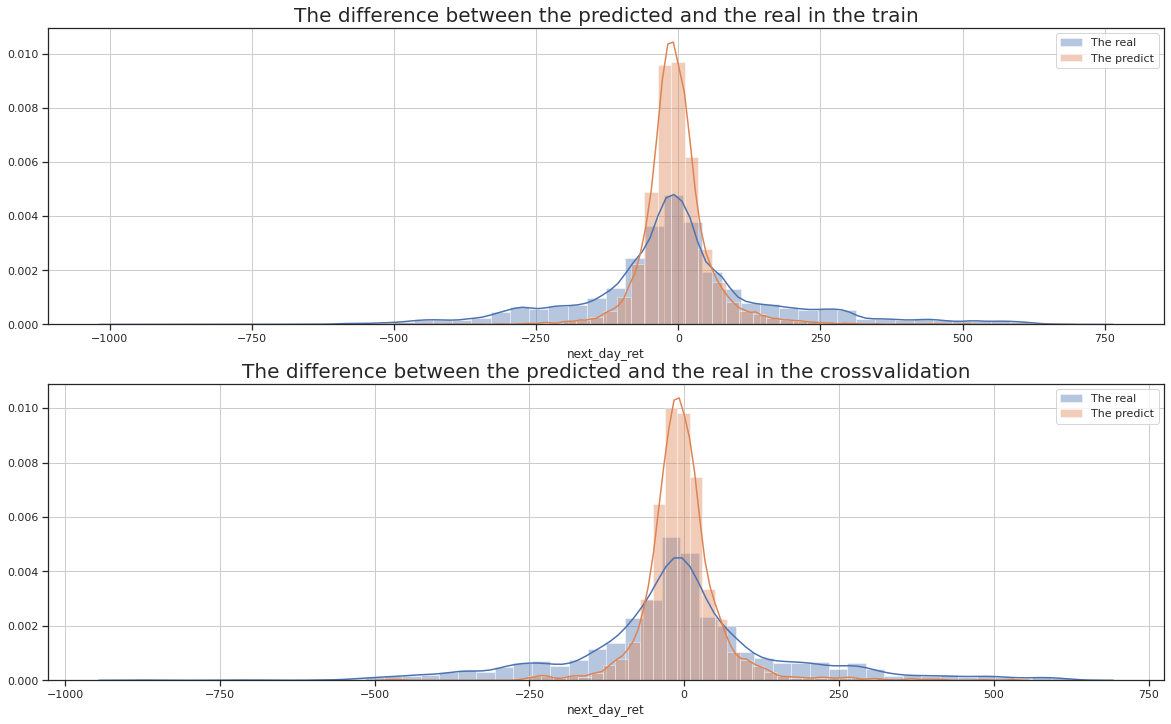

In [58]:
plt.figure(figsize=(20,12))
plt.subplot(211)
plt.title("The difference between the predicted and the real in the train",fontsize=20)
sns.distplot(Y_train,label='The real')
sns.distplot(preds_train,label='The predict')
plt.legend()
plt.grid()
plt.subplot(212)
plt.title("The difference between the predicted and the real in the crossvalidation",fontsize=20)
sns.distplot(y_test,label='The real')
sns.distplot(pred_test,label='The predict')
plt.legend()
plt.grid()

What really matters for us is the crossvalidation, so let's see the mean and the standard diviation of validation test.

In [59]:
print("Some informations about the real : mean={},  std={}".format(y_test.mean(),y_test.std()))
print("Some informaitons about predicted: mean={},  std={}".format(pred_test.mean(),pred_test.mean()))

Some informations about the real : mean=-8.68272322035892,  std=175.90231556559291
Some informaitons about predicted: mean=-3.9566235518945887,  std=-3.9566235518945887


Here we can see that the mean of the real and the predicted are too close to each other but their standard deviation are significantly different(that's obvious from the graph above). 

<Figure size 432x288 with 0 Axes>

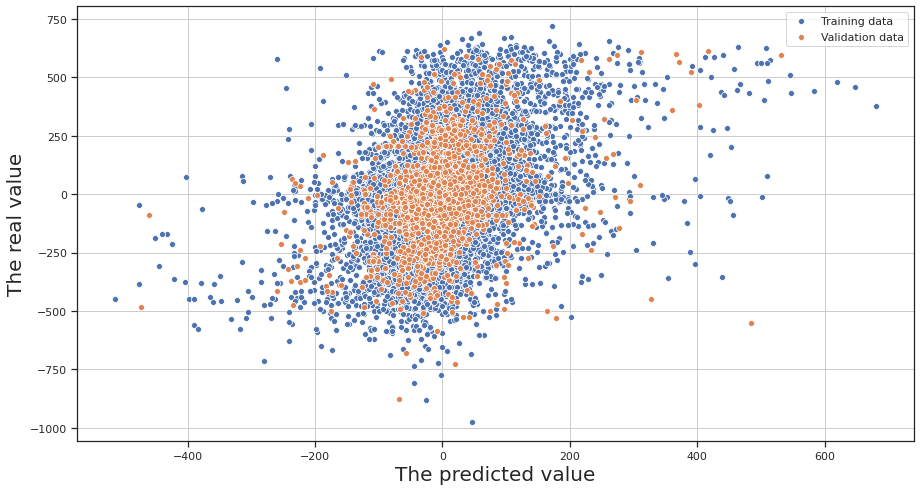

In [60]:
fig=plt.figure()
plt.subplots(figsize= [15,8])
sns.scatterplot(preds_train, Y_train, label = "Training data")
sns.scatterplot(pred_test, y_test, label = "Validation data")
plt.ylabel("The real value",fontsize=20)
plt.xlabel("The predicted value",fontsize=20)
plt.legend()
plt.grid()
plt.show()

Now let's train the model on the whole train data.

In [61]:
Linear_model_full_data = reg.fit(train, target)

In [62]:
prediction=Linear_model_full_data.predict(test)
print(prediction)

[  2.71510669 -56.63296495 -33.31873342 ...  25.94446654  24.60057952
  16.00250985]


## $3)~Making~a~submission$

In [63]:
sub['next_day_ret']=prediction
sub.to_csv("submission_with_linear_regression.csv",index=False)